[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-2/state-schema.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239426-lesson-1-state-schema)

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [2]:
from typing_extensions import TypedDict

class TypedDictState(TypedDict):
    foo: str
    bar: str

In [4]:
from typing import Literal

class TypedDictState(TypedDict):
    name: str
    movie: Literal["Star Wars","Swades", "Back to the Future", "Pulp Fiction", "Interstellar", "PK"]

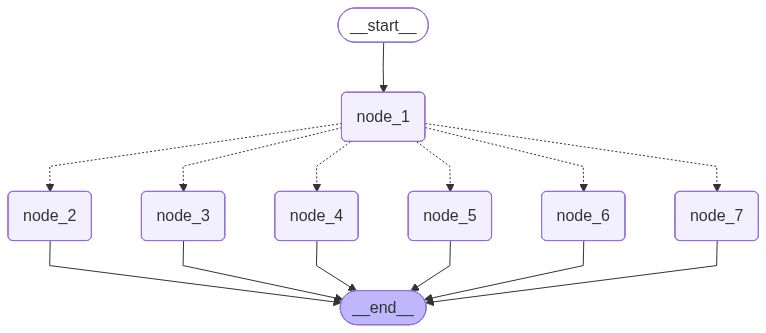

In [5]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def node_1(state):
    print("---Node 1---")
    return {"name": state['name'] + "'s favourite movie is"}

def node_2(state):
    print("---Node 2---")
    return {"movie": "Star Wars"}

def node_3(state):
    print("---Node 3---")
    return {"movie": "Swades"}

def node_4(state):
    print("---Node 4---")
    return {"movie": "Back to the Future"}

def node_5(state):
    print("---Node 5---")
    return {"movie": "Pulp Fiction"}

def node_6(state):
    print("---Node 6---")
    return {"movie": "Interstellar"}

def node_7(state):
    print("---Node 7---")
    return {"movie": "PK"}

def decide_movie(state) -> Literal["node_2", "node_3", "node_4", "node_5", "node_6", "node_7"]:
    nodes=["node_2", "node_3", "node_4", "node_5", "node_6", "node_7"]
    return random.choice(nodes)

# Build graph
builder = StateGraph(TypedDictState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)
builder.add_node("node_7", node_7)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_movie)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)
builder.add_edge("node_7", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"name":"Akash"})

---Node 1---
---Node 2---


{'name': "Akash's favourite movie is", 'movie': 'Star Wars'}

## Dataclass

In [10]:
from dataclasses import dataclass

@dataclass
class DataclassState:
    name: str
    movie: Literal["Star Wars","Swades", "Back to the Future", "Pulp Fiction", "Interstellar", "PK"]

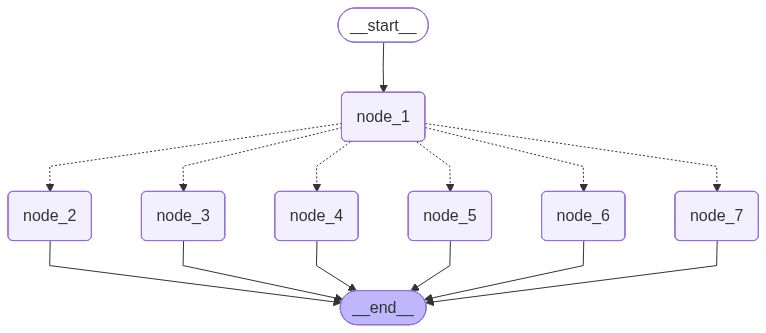

In [11]:
def node_1(state):
    print("---Node 1---")
    return {"name": state.name + "'s favourite movie is "}

# Build graph
builder = StateGraph(DataclassState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)
builder.add_node("node_7", node_7)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_movie)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)
builder.add_edge("node_7", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke(DataclassState(name="Akash", movie="Back to the Future"))

---Node 1---
---Node 4---


{'name': "Akash's favourite movie is ", 'movie': 'Back to the Future'}

## Pydantic

In [13]:
dataclass_instance = DataclassState(name="Akash", movie="Goodfellas")
#no errors even though Goodfellas is not in the list of movies

[Pydantic](https://docs.pydantic.dev/latest/api/base_model/) is a data validation and settings management library using Python type annotations. 

It's particularly well-suited [for defining state schemas in LangGraph](https://langchain-ai.github.io/langgraph/how-tos/state-model/) due to its validation capabilities.

Pydantic can perform validation to check whether data conforms to the specified types and constraints at runtime.

In [19]:
from pydantic import BaseModel, field_validator, ValidationError

class PydanticState(BaseModel):
    name: str
    movie: Literal["Star Wars","Swades", "Back to the Future", "Pulp Fiction", "Interstellar", "PK"]

    @field_validator('movie')
    @classmethod
    def validate_movie(cls, value):
        # Ensure the movie is in the list of movies
        if value not in ["Star Wars","Swades", "Back to the Future", "Pulp Fiction", "Interstellar", "PK"]:
            raise ValueError("Each movie should be from the movie list")
        return value

try:
    state = PydanticState(name="Akash", movie="Oppenheimer")
except ValidationError as e:
    print("Validation Error:", e)

Validation Error: 1 validation error for PydanticState
movie
  Input should be 'Star Wars', 'Swades', 'Back to the Future', 'Pulp Fiction', 'Interstellar' or 'PK' [type=literal_error, input_value='Oppenheimer', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/literal_error


We can use `PydanticState` in our graph seamlessly. 

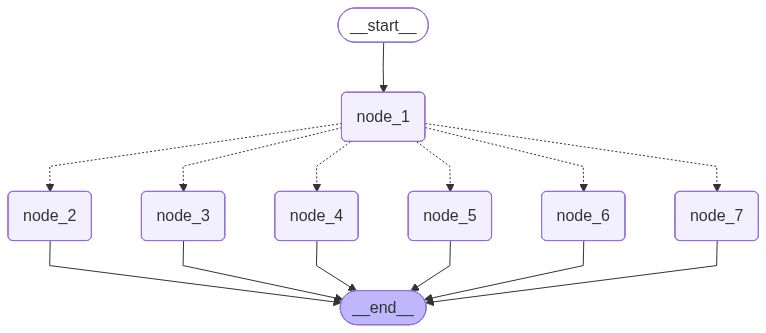

In [20]:
# Build graph
builder = StateGraph(PydanticState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)
builder.add_node("node_7", node_7)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_movie)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)
builder.add_edge("node_7", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke(PydanticState(name="Akash", movie="Interstellar"))

---Node 1---
---Node 6---


{'name': "Akash's favourite movie is ", 'movie': 'Interstellar'}

In [ ]:
graph.invoke(PydanticState(name="Akash", movie="Oppenheimer"))
#should print ValidationError

ValidationError: 1 validation error for PydanticState
movie
  Input should be 'Star Wars', 'Swades', 'Back to the Future', 'Pulp Fiction', 'Interstellar' or 'PK' [type=literal_error, input_value='Oppenheimer', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/literal_error